In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

In [2]:
data_folder = "../data/ADEChallengeData2016/"

# EDA Filename clean up

In [3]:
train_files = pd.read_table("../data/ADE20K_object150_train.txt", header= None).values
train_files = [tem[0] for tem in train_files]

In [4]:
annotation_files = [tem[0:-4] + ".png" for tem in train_files]

In [5]:
print(train_files[0:10])
print(annotation_files[0:10])

['training/ADE_train_00008252.jpg', 'training/ADE_train_00017903.jpg', 'training/ADE_train_00008235.jpg', 'training/ADE_train_00004069.jpg', 'training/ADE_train_00006067.jpg', 'training/ADE_train_00007547.jpg', 'training/ADE_train_00002107.jpg', 'training/ADE_train_00008424.jpg', 'training/ADE_train_00019605.jpg', 'training/ADE_train_00012076.jpg']
['training/ADE_train_00008252.png', 'training/ADE_train_00017903.png', 'training/ADE_train_00008235.png', 'training/ADE_train_00004069.png', 'training/ADE_train_00006067.png', 'training/ADE_train_00007547.png', 'training/ADE_train_00002107.png', 'training/ADE_train_00008424.png', 'training/ADE_train_00019605.png', 'training/ADE_train_00012076.png']


In [6]:
X = np.array(train_files)
Y = np.array(annotation_files)
print("Number of training samples is X %i and Y %i"%(X.shape[0], Y.shape[0]))

Number of training samples is X 20210 and Y 20210


In [7]:
# X_width = np.zeros(X.shape)
# X_height = np.zeros(X.shape)
# Y_width = np.zeros(Y.shape)
# Y_height = np.zeros(Y.shape)
# n = len(X)
# for i in xrange(n):
#     if i%1000 == 0:
#         print(i)
#     ximage = Image.open(data_folder + X[i])
#     yimage = Image.open(data_folder + Y[i])
#     X_width[i], X_height[i] = ximage.size
#     Y_width[i], Y_height[i] = yimage.size
# train_files["x_w"] = X_width
# train_files["x_h"] = X_height
# train_files["y_w"] = Y_width
# train_files["y_h"] = Y_height
# 
# f_label = lambda x : x.split("/")[3]
# train_files["label"] = train_files["X"].apply(f_label)
# train_files.to_csv("../data/ADE20K_2016_07_26/images/imsize_train.csv")

train_files_full = pd.read_csv("../data/imsize_train.csv")

Window Width is 130 - 6144 
Window Height is 96 - 6000 
Image area is 12480 - 27000000 


/home/jingbo/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


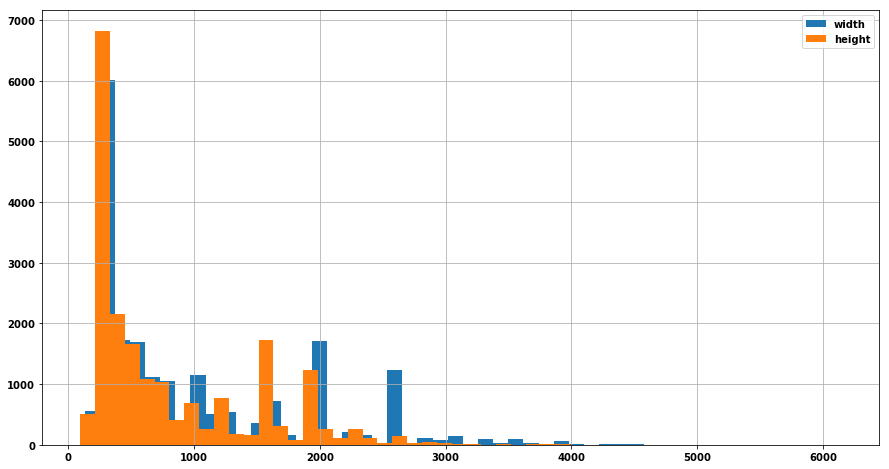

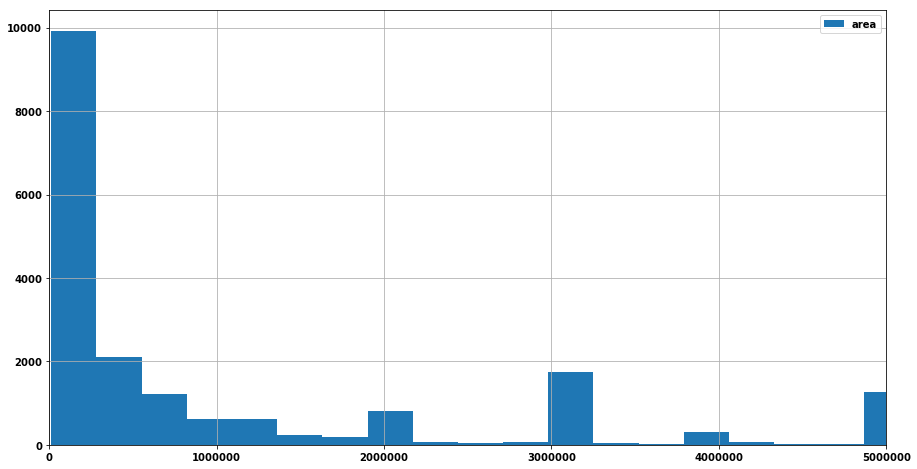

In [8]:
## Statistics about the image size and areas
train_files_full["area"] = train_files_full["x_w"] * train_files_full["x_h"]
print("Window Width is %i - %i "%(train_files_full["x_w"].min(),train_files_full["x_w"].max()))
print("Window Height is %i - %i "%(train_files_full["x_h"].min(),train_files_full["x_h"].max()))
print("Image area is %i - %i "%(train_files_full["area"].min(),train_files_full["area"].max()))
plt.figure(figsize=(15,8))
train_files_full["x_w"].hist(bins = 50, label = "width")
train_files_full["x_h"].hist(bins = 50, label = "height")
plt.legend()

plt.figure(figsize=(15,8))
train_files_full["area"].hist(bins = 100, label = "area")
plt.xlim([0,5000000])
plt.legend()

In [9]:
len(train_files_full["label"].unique())

2420

In [10]:
print("Mistmatch of training width and label width is %f"%(np.sum(train_files_full["y_w"] - train_files_full["x_w"] != 0)))
print("Mistmatch of training height and label height is %f"%(np.sum(train_files_full["y_h"] - train_files_full["x_h"] != 0)))

Mistmatch of training width and label width is 0.000000
Mistmatch of training height and label height is 0.000000


## Raw Image and Target QCs

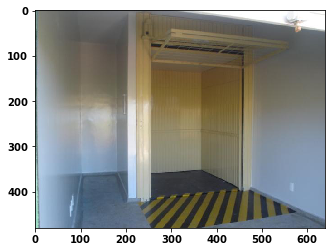

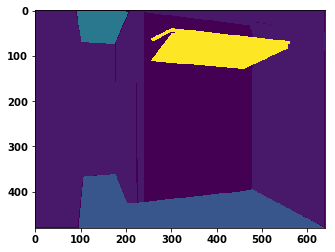

In [11]:
train_sample1 = Image.open(data_folder + "images/" + X[5])
label_sample1 = Image.open(data_folder + "annotations/" + Y[5])
plt.imshow(train_sample1)
plt.show()
plt.imshow(label_sample1)
plt.show()

In [14]:
pic_index = np.random.choice(xrange(len(X)), size=8, replace=False)
pic_list = []
for indexc in pic_index:
    pic_list.append(data_folder + "images/" + X[indexc])
    pic_list.append(data_folder + "annotations/" + Y[indexc])

In [15]:
## Create a toggable pictures in a pptx
from utils import create_pptx    
create_pptx("QC_Dec_12.pptx",pic_list)

(16, 2)


## Convert the training the images into grale scale and train the benchmark model

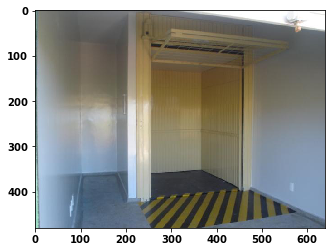

In [18]:
label_sample1 = Image.open(data_folder + "images/" + X[5])
plt.imshow(label_sample1)
plt.show()

In [61]:
img_array = np.array(label_sample1.getdata())
label_sample1.size

(300, 205)

In [60]:
img_array.shape

(61500, 3)

In [83]:
from utils import jpg_image_to_array
img_array2 = jpg_image_to_array(Y[5])
img_array2.shape

(205, 300, 3)

In [84]:
img_array2[100,100:110,:]

array([[ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109],
       [ 80, 127, 109]], dtype=uint8)

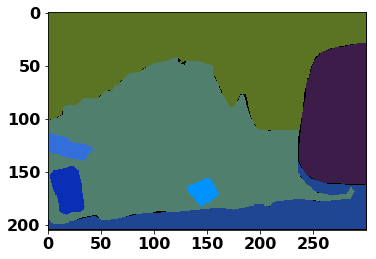

In [85]:
im_recovery = Image.fromarray(img_array2)
plt.imshow(im_recovery)
plt.show()